In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/Heart_Disease_Prediction.csv')



In [14]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [15]:
df.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [16]:
df.shape

(270, 14)

In [17]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [19]:
numerical_features = df.select_dtypes(include=['int64', 'float64'])
numerical_features.columns


Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium'],
      dtype='object')

In [20]:
categorical_features = df.select_dtypes(include=['object'])
categorical_features.columns

Index(['Heart Disease'], dtype='object')

In [21]:
df.isnull().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


In [22]:
df.isnull().values.any()

np.False_

In [23]:
df[df.isnull().any(axis=1)]

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease


In [24]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [25]:
import numpy as np

In [26]:
age_array=df['Age'].to_numpy()
age_array

array([70, 67, 57, 64, 74, 65, 56, 59, 60, 63, 59, 53, 44, 61, 57, 71, 46,
       53, 64, 40, 67, 48, 43, 47, 54, 48, 46, 51, 58, 71, 57, 66, 37, 59,
       50, 48, 61, 59, 42, 48, 40, 62, 44, 46, 59, 58, 49, 44, 66, 65, 42,
       52, 65, 63, 45, 41, 61, 60, 59, 62, 57, 51, 44, 60, 63, 57, 51, 58,
       44, 47, 61, 57, 70, 76, 67, 45, 45, 39, 42, 56, 58, 35, 58, 41, 57,
       42, 62, 59, 41, 50, 59, 61, 54, 54, 52, 47, 66, 58, 64, 50, 44, 67,
       49, 57, 63, 48, 51, 60, 59, 45, 55, 41, 60, 54, 42, 49, 46, 56, 66,
       56, 49, 54, 57, 65, 54, 54, 62, 52, 52, 60, 63, 66, 42, 64, 54, 46,
       67, 56, 34, 57, 64, 59, 50, 51, 54, 53, 52, 40, 58, 41, 41, 50, 54,
       64, 51, 46, 55, 45, 56, 66, 38, 62, 55, 58, 43, 64, 50, 53, 45, 65,
       69, 69, 67, 68, 34, 62, 51, 46, 67, 50, 42, 56, 41, 42, 53, 43, 56,
       52, 62, 70, 54, 70, 54, 35, 48, 55, 58, 54, 69, 77, 68, 58, 60, 51,
       55, 52, 60, 58, 64, 37, 59, 51, 43, 58, 29, 41, 63, 51, 54, 44, 54,
       65, 57, 63, 35, 41

In [27]:
age_array_2d=np.reshape(age_array,(-1,1))
age_array_2d

array([[70],
       [67],
       [57],
       [64],
       [74],
       [65],
       [56],
       [59],
       [60],
       [63],
       [59],
       [53],
       [44],
       [61],
       [57],
       [71],
       [46],
       [53],
       [64],
       [40],
       [67],
       [48],
       [43],
       [47],
       [54],
       [48],
       [46],
       [51],
       [58],
       [71],
       [57],
       [66],
       [37],
       [59],
       [50],
       [48],
       [61],
       [59],
       [42],
       [48],
       [40],
       [62],
       [44],
       [46],
       [59],
       [58],
       [49],
       [44],
       [66],
       [65],
       [42],
       [52],
       [65],
       [63],
       [45],
       [41],
       [61],
       [60],
       [59],
       [62],
       [57],
       [51],
       [44],
       [60],
       [63],
       [57],
       [51],
       [58],
       [44],
       [47],
       [61],
       [57],
       [70],
       [76],
       [67],
       [45],
       [45],

In [28]:
mean_age=np.mean(age_array)
mean_age

np.float64(54.43333333333333)

In [29]:
meadan_age=np.median(age_array)
meadan_age

np.float64(55.0)

In [30]:
std_age=np.std(age_array)
std_age

np.float64(9.092182234083177)

In [31]:
cholesterol_array = df['Cholesterol'].to_numpy()
max_cholesterol = np.max(cholesterol_array)
max_cholesterol

np.int64(564)

In [32]:
min_age=np.min(age_array)
min_age

np.int64(29)

In [33]:
count_patientes=df['Heart Disease'].value_counts()
count_patientes

,count
Heart Disease,
Absence,150
Presence,120


In [34]:
count_age=df['Age'].value_counts()
count_age

,count
Age,
54,16
58,15
60,12
59,12
57,12
51,12
62,11
52,11
44,10


In [35]:
import matplotlib.pyplot as plt

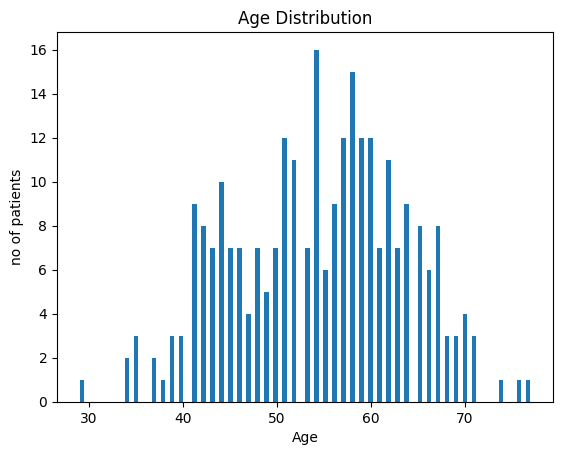

In [36]:
plt.hist(age_array,bins=100)
plt.xlabel('Age')
plt.ylabel('no of patients')
plt.title('Age Distribution')
plt.show()

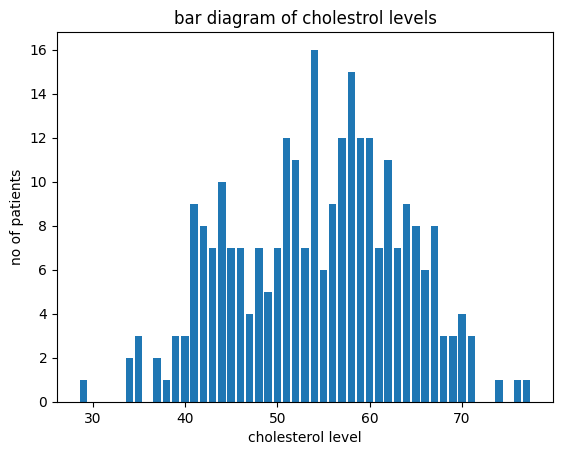

In [37]:
values,counts=np.unique(age_array,return_counts=True)
plt.bar(values,counts)
plt.xlabel('cholesterol level')
plt.ylabel('no of patients')
plt.title('bar diagram of cholestrol levels')
plt.show()

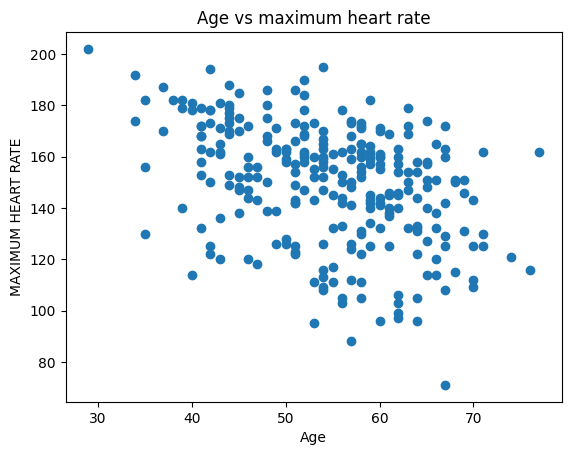

In [38]:
plt.scatter(df['Age'],df['Max HR'])
plt.xlabel('Age')
plt.ylabel('MAXIMUM HEART RATE')
plt.title('Age vs maximum heart rate')
plt.show()

In [39]:
#correlation_matrix=df.corr()
#correlation_matrix
#it gives error :corrections need only numbers .but in dataset we have object dataype in set named:heart diseases)
#we need to drop heart disesas coloumns

In [40]:
df_new=df.drop(['Heart Disease'],axis=1)
df_new

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [42]:
correlation_matrix=df_new.corr()
correlation_matrix
correlation_matrix.round(2)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.00,-0.09,0.10,0.27,0.22,0.12,0.13,-0.40,0.10,0.19,0.16,0.36,0.11
Sex,-0.09,1.00,0.03,-0.06,-0.20,0.04,0.04,-0.08,0.18,0.10,0.05,0.09,0.39
Chest pain type,0.10,0.03,1.00,-0.04,0.09,-0.10,0.07,-0.32,0.35,0.17,0.14,0.23,0.26
BP,0.27,-0.06,-0.04,1.00,0.17,0.16,0.12,-0.04,0.08,0.22,0.14,0.09,0.13
Cholesterol,0.22,-0.20,0.09,0.17,1.00,0.03,0.17,-0.02,0.08,0.03,-0.01,0.13,0.03
FBS over 120,0.12,0.04,-0.10,0.16,0.03,1.00,0.05,0.02,-0.00,-0.03,0.04,0.12,0.05
EKG results,0.13,0.04,0.07,0.12,0.17,0.05,1.00,-0.07,0.10,0.12,0.16,0.11,0.01
Max HR,-0.40,-0.08,-0.32,-0.04,-0.02,0.02,-0.07,1.00,-0.38,-0.35,-0.39,-0.27,-0.25
Exercise angina,0.10,0.18,0.35,0.08,0.08,-0.00,0.10,-0.38,1.00,0.27,0.26,0.15,0.32
ST depression,0.19,0.10,0.17,0.22,0.03,-0.03,0.12,-0.35,0.27,1.00,0.61,0.26,0.32


In [43]:
high_corr=correlation_matrix.abs()>0.8
high_corr

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,True,False,False,False,False,False,False,False,False,False,False,False,False
Sex,False,True,False,False,False,False,False,False,False,False,False,False,False
Chest pain type,False,False,True,False,False,False,False,False,False,False,False,False,False
BP,False,False,False,True,False,False,False,False,False,False,False,False,False
Cholesterol,False,False,False,False,True,False,False,False,False,False,False,False,False
FBS over 120,False,False,False,False,False,True,False,False,False,False,False,False,False
EKG results,False,False,False,False,False,False,True,False,False,False,False,False,False
Max HR,False,False,False,False,False,False,False,True,False,False,False,False,False
Exercise angina,False,False,False,False,False,False,False,False,True,False,False,False,False
ST depression,False,False,False,False,False,False,False,False,False,True,False,False,False
